In [317]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/summer-products-and-sales-in-ecommerce-wish/unique-categories.csv
/kaggle/input/summer-products-and-sales-in-ecommerce-wish/unique-categories.sorted-by-count.csv
/kaggle/input/summer-products-and-sales-in-ecommerce-wish/summer-products-with-rating-and-performance_2020-08.csv


In [318]:
from plotly.offline import iplot, init_notebook_mode

import cufflinks as cf
import plotly.graph_objs as go
# import chart_studio.plotly as py

init_notebook_mode(connected=True)
cf.go_offline(connected=True)

# Set global theme
cf.set_config_file(world_readable=True, theme='ggplot')

# Data Info

## Context

Studying top products requires more than just product listings. You also need to know what sells well and what does not.

## Content

This dataset contains product listings as well as products ratings and sales performance, which you would not find in other datasets.

With this, you can finally start to look for correlations and patterns regarding the success of a product and the various components.

## Inspiration

How about trying to validate the established idea of human sensitiveness to price drops ? (discounted price compared to original retail_price)

You may look for top categories of products so that you know what sells best

Do bad products sell ? 

How about the relationship between the quality of a product (ratings) and its success ? 

Does the price factor into this ?



## Infos on Columns

1. title : Title for localized for european countries. May be the same as title_orig if the seller did not offer a translation.

2. title_orig : Original english title of the product.

3. price : price for the buyer

4. retail_price : Retail price, or reference price in other stores/places. Used by the seller to indicate a regular value or the price before discount.

5. currency_buyer : currency of the prices

6. units_sold : Number of units sold. Lower bound approximation by steps

7. uses_ad_boosts : Whether the seller paid to boost his product within the platform (highlighting, better placement or whatever).

8. rating : Mean product rating.

9. rating_count : Total number of ratings of the product

10. rating_five_count  : Number of 5-star ratings (there are also similar rating columns for four, three .. stars)

11. badges_count : Number of badges the product or the seller have.

12. badge_local_product : A badge that denotes the product is a local product. Conditions may vary (being produced locally, or something else).  Some people may prefer buying local products rather than. 1 means Yes, has the badge. 

13. badge_product_quality : Badge awarded when many buyers consistently gave good evaluations 1 means Yes, has the badge

14. badge_fast_shipping : Badge awarded when this product's order is consistently shipped rapidly

15. tags : tags set by the seller

16. product_color : Product's main color

17. product_variation_size_id : One of the available size variation for this product

18. product_variation_inventory : Inventory the seller has. Max allowed quantity is 50

19. shipping_option_price : shipping price

20. shipping_is_express : whether the shipping is express or not. 1 for True

21. countries_shipped_to : Number of countries this product is shipped to. Sellers may choose to limit where they ship a product to

22. inventory_total : Total inventory for all the product's variations (size/color variations for instance)

23. has_urgency_banner : whether there was an urgency banner with an urgency

24. merchant_rating : merchant's rating

*Note: Not all the columns are present in the above description.*


In [319]:
df = pd.read_csv("/kaggle/input/summer-products-and-sales-in-ecommerce-wish/summer-products-with-rating-and-performance_2020-08.csv")

In [320]:
uniuqe_categories = pd.read_csv("/kaggle/input/summer-products-and-sales-in-ecommerce-wish/unique-categories.csv")
uniuqe_categories_count = pd.read_csv("/kaggle/input/summer-products-and-sales-in-ecommerce-wish/unique-categories.sorted-by-count.csv")

In [322]:
df.head(2)

,title,title_orig,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,...,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,product_url,product_picture,product_id,theme,crawl_month
0,2020 Summer Vintage Flamingo Print Pajamas Se...,2020 Summer Vintage Flamingo Print Pajamas Se...,16.0,14,EUR,100,0,3.76,54,26.0,...,568,4.128521,595097d6a26f6e070cb878d1,0,NaN,https://www.wish.com/c/5e9ae51d43d6a96e303acdb0,https://contestimg.wish.com/api/webimage/5e9ae...,5e9ae51d43d6a96e303acdb0,summer,2020-08
1,SSHOUSE Summer Casual Sleeveless Soirée Party ...,Women's Casual Summer Sleeveless Sexy Mini Dress,8.0,22,EUR,20000,1,3.45,6135,2269.0,...,17752,3.899673,56458aa03a698c35c9050988,0,NaN,https://www.wish.com/c/58940d436a0d3d5da4e95a38,https://contestimg.wish.com/api/webimage/58940...,58940d436a0d3d5da4e95a38,summer,2020-08


# Explorations

In [323]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1573 entries, 0 to 1572
Data columns (total 43 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title                         1573 non-null   object 
 1   title_orig                    1573 non-null   object 
 2   price                         1573 non-null   float64
 3   retail_price                  1573 non-null   int64  
 4   currency_buyer                1573 non-null   object 
 5   units_sold                    1573 non-null   int64  
 6   uses_ad_boosts                1573 non-null   int64  
 7   rating                        1573 non-null   float64
 8   rating_count                  1573 non-null   int64  
 9   rating_five_count             1528 non-null   float64
 10  rating_four_count             1528 non-null   float64
 11  rating_three_count            1528 non-null   float64
 12  rating_two_count              1528 non-null   float64
 13  rat

## Merchant Columns

In [324]:
print(df.loc[:,df.columns.str.startswith("merchant")].columns.values)

['merchant_title' 'merchant_name' 'merchant_info_subtitle'
 'merchant_rating_count' 'merchant_rating' 'merchant_id'
 'merchant_has_profile_picture' 'merchant_profile_picture']


lets drop everything related to merchent except *merchant_id, merchant_rating_count,and merchant_ratings*.

In [325]:
df.drop(['merchant_has_profile_picture', 'merchant_profile_picture','merchant_title' ,'merchant_name', 'merchant_info_subtitle'], inplace=True, axis=1)

## Null Columns 

In [326]:
df.isnull().sum()

title                             0
title_orig                        0
price                             0
retail_price                      0
currency_buyer                    0
units_sold                        0
uses_ad_boosts                    0
rating                            0
rating_count                      0
rating_five_count                45
rating_four_count                45
rating_three_count               45
rating_two_count                 45
rating_one_count                 45
badges_count                      0
badge_local_product               0
badge_product_quality             0
badge_fast_shipping               0
tags                              0
product_color                    41
product_variation_size_id        14
product_variation_inventory       0
shipping_option_name              0
shipping_option_price             0
shipping_is_express               0
countries_shipped_to              0
inventory_total                   0
has_urgency_banner          

In [327]:
df.loc[:,df.isnull().sum()>0].columns


Index(['rating_five_count', 'rating_four_count', 'rating_three_count',
       'rating_two_count', 'rating_one_count', 'product_color',
       'product_variation_size_id', 'has_urgency_banner', 'urgency_text',
       'origin_country'],
      dtype='object')

## Theme column

In [328]:
df.theme.value_counts()

summer    1573
Name: theme, dtype: int64

Theme column has only one value *summer*, so its no-use for analysis or model prediction. Lets drop this column.


In [329]:
df.drop('theme', axis=1, inplace=True)

## Title and Title_orig column

Title and title_orig columns share same value, for our case, lets use the one with english tilte i.e. title_orig and drop title column.


In [330]:
df.drop("title", axis=1, inplace=True)

## Urgency Text and Urgency Banner

Both columns have null values, and in very large number so lets drop them.


In [331]:

df.drop(['urgency_text','has_urgency_banner'], inplace=True,axis=1)

Fill the rest of null-columns by value "unknown".

In [332]:
df.fillna(value="unknown", inplace=True)

## Currency Column

In [333]:
df.currency_buyer.unique()

array(['EUR'], dtype=object)

Since the data was only taken from France, currency is only in euros. Lets remember that and drop the columns

In [334]:
df.drop('currency_buyer', inplace=True, axis=1)

## Crawl Month

In [335]:
df.crawl_month.unique()

array(['2020-08'], dtype=object)

Looke like crawl month is only from August, lets drop this column too.

In [336]:
df.drop('crawl_month', inplace=True, axis=1)

## Badges Columns

In [337]:
df.loc[:,df.columns.str.startswith('badge')].columns

Index(['badges_count', 'badge_local_product', 'badge_product_quality',
       'badge_fast_shipping'],
      dtype='object')

Lets convert **'badge_local_product', 'badge_product_quality', 'badge_fast_shipping'** into categorical values.

In [338]:
df[['badge_local_product', 'badge_product_quality','badge_fast_shipping']] = df[['badge_local_product', 'badge_product_quality','badge_fast_shipping']].astype(str)

# EDA 

lets do some explorations via visualizations

## Origin Country

In [339]:
eda_df = df.copy()

## Rename country columns for clear meaning

In [340]:
eda_df.origin_country = eda_df.origin_country.str.replace( 'CN',"China" )
eda_df.origin_country = eda_df.origin_country.str.replace( "US","United States of America" )
eda_df.origin_country = eda_df.origin_country.str.replace( "unknown","unknown" )
eda_df.origin_country = eda_df.origin_country.str.replace( "VE","Venezuela" )
eda_df.origin_country = eda_df.origin_country.str.replace( 'GB',"Great Britain" )
eda_df.origin_country = eda_df.origin_country.str.replace( 'SG',"Singapore" )
eda_df.origin_country = eda_df.origin_country.str.replace( 'AT',"Austria" )
    

In [341]:
labels = eda_df.origin_country.value_counts(normalize=True).index.values

values  = eda_df.origin_country.value_counts().values

# Create Pie Chart

fig = go.Figure()
fig.add_trace(go.Pie(labels=labels, values=values))
fig.update_layout(title="Country of Origin of Product in Wish", legend_title="Countries", template="plotly_dark")



Seems the products mostly originate from China.

In [342]:
# Lets create so called discounts column by subtracting the price from  retail_price

eda_df['discounted_price'] = eda_df['retail_price'] - eda_df['price']
prices_by_country = eda_df[['price','discounted_price','retail_price','origin_country']].groupby('origin_country').mean()

In [343]:
fig = go.Figure()

fig.add_trace(go.Bar(x=prices_by_country.index.values, y=prices_by_country.price, name="Price"))
fig.add_trace(go.Scatter(x=prices_by_country.index.values, y=prices_by_country.discounted_price, name="Discounted Price"))
fig.add_trace(go.Bar(x=prices_by_country.index.values, y=prices_by_country.retail_price, name="Retail Price"))
fig.update_layout(title="Prices Categories By Country", xaxis_title="Countries", yaxis_title="Avg Discount Prices", template="plotly_dark", legend_title="Legend")


The graph, displpays that theres a heavy discounts on prodcuts from Venezuela as displayed by red line by avg of around 27 euros. 

Surprisingly, from the period of July,2020, when the data was taken, selling prices are higher than retail prices in countries like **Austria, GB and Singapore**. China where most of the product in the data is coming from is sold on average of around 8.5 euros with discounts on average of around 14 euros.



## Prices In China 

In [344]:
eda_df[eda_df.origin_country=="China"]['price'].describe()

count    1516.000000
mean        8.341629
std         3.940071
min         1.000000
25%         5.830000
50%         8.000000
75%        11.000000
max        49.000000
Name: price, dtype: float64

About 75% of products coming from China are near 10 euros.

In [345]:
layout=dict(title="Selling Price Ranges In China", xaxis_title="Prices", yaxis_title="Frequency",)
eda_df[eda_df.origin_country=="China"]['price'].iplot(kind="hist", bins=50 , layout=layout)

In [346]:
eda_df[eda_df.origin_country=="China"]['retail_price'].describe()

count    1516.000000
mean       23.294195
std        30.634789
min         1.000000
25%         7.000000
50%        10.000000
75%        26.000000
max       252.000000
Name: retail_price, dtype: float64

In [347]:
layout=dict(title="Original Price Ranges In China", xaxis_title="Prices", yaxis_title="Frequency",)
eda_df[eda_df.origin_country=="China"]['retail_price'].iplot(kind="hist", layout=layout)

## Shipping Options and Prices

In [348]:
eda_df.loc[:,eda_df.columns.str.startswith("shipping")].columns

Index(['shipping_option_name', 'shipping_option_price', 'shipping_is_express'], dtype='object')

In [349]:
eda_df['shipping_option_name'].value_counts()

Livraison standard         1508
Standard Shipping            21
Envio Padrão                  9
Expediere Standard            6
Envío normal                  5
الشحن القياسي                 4
Стандартная доставка          3
Livraison Express             3
Standardowa wysyłka           3
Standardversand               3
Spedizione standard           2
Standart Gönderi              2
การส่งสินค้ามาตรฐาน           2
ការដឹកជញ្ជូនតាមស្តង់ដារ       1
Ekspresowa wysyłka            1
Name: shipping_option_name, dtype: int64

**Livraison standard** is quite populuar option for shipping. Lets check the prices of the company.

In [350]:

livrasion_prices = eda_df[eda_df.shipping_option_name =='Livraison standard']['shipping_option_price'].value_counts().index.values
livrasion_prices_frquency = eda_df[eda_df.shipping_option_name =='Livraison standard']['shipping_option_price'].value_counts().values

fig = go.Figure()
fig.add_trace(go.Pie(labels=livrasion_prices, values=livrasion_prices_frquency))
fig.update_layout(title="Livrasion Standard Prices", legend_title="Prices In Euros", template="plotly_dark")



Most customers choose shipping options from 1-3 euros. 

In [351]:
eda_df['shipping_is_express'].value_counts()

0    1569
1       4
Name: shipping_is_express, dtype: int64

Almost all the shipping is not express

In [352]:
eda_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1573 entries, 0 to 1572
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   title_orig                   1573 non-null   object 
 1   price                        1573 non-null   float64
 2   retail_price                 1573 non-null   int64  
 3   units_sold                   1573 non-null   int64  
 4   uses_ad_boosts               1573 non-null   int64  
 5   rating                       1573 non-null   float64
 6   rating_count                 1573 non-null   int64  
 7   rating_five_count            1573 non-null   object 
 8   rating_four_count            1573 non-null   object 
 9   rating_three_count           1573 non-null   object 
 10  rating_two_count             1573 non-null   object 
 11  rating_one_count             1573 non-null   object 
 12  badges_count                 1573 non-null   int64  
 13  badge_local_produc

## Products and Sales

Lets try and make a small df thats related to product and their sales.

In [353]:
product_cat_columns = eda_df.loc[:,eda_df.columns.str.startswith("product")].columns.values


In [354]:
eda_df[product_cat_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1573 entries, 0 to 1572
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   product_color                1573 non-null   object
 1   product_variation_size_id    1573 non-null   object
 2   product_variation_inventory  1573 non-null   int64 
 3   product_url                  1573 non-null   object
 4   product_picture              1573 non-null   object
 5   product_id                   1573 non-null   object
dtypes: int64(1), object(5)
memory usage: 73.9+ KB


In [355]:
eda_df[product_cat_columns].head()

,product_color,product_variation_size_id,product_variation_inventory,product_url,product_picture,product_id
0,white,M,50,https://www.wish.com/c/5e9ae51d43d6a96e303acdb0,https://contestimg.wish.com/api/webimage/5e9ae...,5e9ae51d43d6a96e303acdb0
1,green,XS,50,https://www.wish.com/c/58940d436a0d3d5da4e95a38,https://contestimg.wish.com/api/webimage/58940...,58940d436a0d3d5da4e95a38
2,leopardprint,XS,1,https://www.wish.com/c/5ea10e2c617580260d55310a,https://contestimg.wish.com/api/webimage/5ea10...,5ea10e2c617580260d55310a
3,black,M,50,https://www.wish.com/c/5cedf17ad1d44c52c59e4aca,https://contestimg.wish.com/api/webimage/5cedf...,5cedf17ad1d44c52c59e4aca
4,yellow,S,1,https://www.wish.com/c/5ebf5819ebac372b070b0e70,https://contestimg.wish.com/api/webimage/5ebf5...,5ebf5819ebac372b070b0e70


Lets drop links 

In [356]:
df.drop(['product_picture','product_url'], inplace=True, axis=1)
eda_df.drop(['product_picture','product_url'], inplace=True, axis=1)

In [357]:
eda_df_products = eda_df[['tags', 'price', 'units_sold', 'rating','rating_count', 'product_id','badges_count', 'badge_product_quality']].copy().sort_values(['units_sold','badges_count'], ascending=False)

eda_df_products_by_id = eda_df_products.set_index('product_id')

In [358]:
eda_df_products_by_id.head()

,tags,price,units_sold,rating,rating_count,badges_count,badge_product_quality
product_id,,,,,,,
5b07a7c6e997b33c6f9947da,"blouse,Plus Size,Lace,lace top,Tops,Fashion,st...",5.00,100000,3.83,17980,0,0
544b079d1280fa28eee9b380,"Mini,Strapless Dress,Spaghetti Strap,Tank,Tops...",5.77,100000,4.10,20744,0,0
54bdf18039b8c045f118936a,"roupas femininas,womens dresses,Lace,gowns,Lon...",8.00,100000,3.76,11062,0,0
53897eeeafddf70c91af1cda,"Summer,Plus Size,Cotton T Shirt,chiffon,Long S...",5.00,100000,3.98,13789,0,0
567cb0925ff12c4829f07dfb,"blouse,Fashion,Shirt,boho,Tops,summer t-shirts...",7.00,100000,3.82,11913,0,0


If u look at the top sold products and their respective badge count then it does not seem there's a positive correlation, however, the units_sold is not clear on months, product relase dates, and so on..

The top 6 products sold are 100k while others are at 50k, so thats a massive difference. 

In [359]:
# Top 10 products sold for women
eda_df_products.loc[eda_df_products.tags.str.contains('[Ww]omen')].head(10).index

Int64Index([17, 92, 214, 251, 1018, 1168, 40, 84, 957, 1466], dtype='int64')

In [360]:
# Top 10 products in general
eda_df_products.head(10).index 

Int64Index([17, 92, 214, 251, 1018, 1168, 40, 84, 957, 1466], dtype='int64')

The index is same for both in general and women products, so top buyers are ladies or for ladies in wish.

Due to huge variation in units plotting without normalizing was not quite helpful.So, lets first normalize and then plot.

In [361]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
eda_df_products_by_id_norm = eda_df_products_by_id.copy()
eda_df_products_by_id_norm.iloc[:,1:] = scaler.fit_transform(eda_df_products_by_id_norm.iloc[:,1:])

In [362]:
fig = go.Figure()

fig.add_trace(go.Bar(x=eda_df_products_by_id_norm.head(20).index.values,y=eda_df_products_by_id_norm.head(20).units_sold,name="Units Sold"  ))
fig.add_trace(go.Scatter(x=eda_df_products_by_id_norm.head(20).index.values,y=eda_df_products_by_id_norm.head(20).price, mode="lines+markers", name="Price" ))
fig.add_trace(go.Scatter(x=eda_df_products_by_id_norm.head(20).index.values,y=eda_df_products_by_id_norm.head(20).rating_count,mode="lines+markers",name="Rating Counts"  ))
fig.add_trace(go.Scatter(x=eda_df_products_by_id_norm.head(20).index.values,y=eda_df_products_by_id_norm.head(20).rating,mode="lines+markers",name="Avg. Rating"  ))

fig.update_layout(title="Top 20 Products Sold", legend_title="Features")

In [363]:
eda_df_products_by_id.head(20).describe()

,price,units_sold,rating,rating_count,badges_count
count,20.000000,20.000000,20.0000,20.000000,20.000000
mean,6.857000,65000.000000,3.8725,12256.950000,0.200000
std,2.487472,23508.117299,0.2710,4543.579408,0.410391
min,3.000000,50000.000000,3.3500,5359.000000,0.000000
25%,5.502500,50000.000000,3.7425,8847.250000,0.000000
50%,7.000000,50000.000000,3.8350,11660.500000,0.000000
75%,8.000000,100000.000000,4.0250,15287.000000,0.000000
max,15.000000,100000.000000,4.4100,20744.000000,1.000000


In [364]:
eda_df_products_by_id.head(10)

,tags,price,units_sold,rating,rating_count,badges_count,badge_product_quality
product_id,,,,,,,
5b07a7c6e997b33c6f9947da,"blouse,Plus Size,Lace,lace top,Tops,Fashion,st...",5.00,100000,3.83,17980,0,0
544b079d1280fa28eee9b380,"Mini,Strapless Dress,Spaghetti Strap,Tank,Tops...",5.77,100000,4.10,20744,0,0
54bdf18039b8c045f118936a,"roupas femininas,womens dresses,Lace,gowns,Lon...",8.00,100000,3.76,11062,0,0
53897eeeafddf70c91af1cda,"Summer,Plus Size,Cotton T Shirt,chiffon,Long S...",5.00,100000,3.98,13789,0,0
567cb0925ff12c4829f07dfb,"blouse,Fashion,Shirt,boho,Tops,summer t-shirts...",7.00,100000,3.82,11913,0,0
571adeab62cce546f1a46bc0,"slim dress,Mini,Elegant,Dress,Mini dress,turtl...",5.67,100000,3.53,18393,0,0
556fbe8595528719e004fa27,"blouse,Mini,Fashion,longtop,Shirt,kaftandresse...",9.00,50000,4.26,5359,1,1
5ad987d8918dae087d633040,"blouse,Summer,Plus Size,Tank,Lace,Tops,topsamp...",7.00,50000,4.41,17444,1,1
57cfd9cc1640562050e48bec,"Mini,Fashion,Necks,Sleeve,Summer,Dress,crew ne...",6.00,50000,4.20,12880,1,1


From plot and description, 75%  of the prodcut's cost less than 10 euros and products have average ratings of 3.8.

## Discounts, Ratings and Sales

We'll first select some columns seems more relevant to the context. After that lets apply binning of every 1k units sold to get a better grasp of proper range of sale and then analyse it. 

In [365]:
dis_rat_slaes = eda_df[['rating', 'product_id', 'units_sold', 'price','discounted_price']]
dis_rat_slaes.set_index('product_id').head()

,rating,units_sold,price,discounted_price
product_id,,,,
5e9ae51d43d6a96e303acdb0,3.76,100,16.00,-2.00
58940d436a0d3d5da4e95a38,3.45,20000,8.00,14.00
5ea10e2c617580260d55310a,3.57,100,8.00,35.00
5cedf17ad1d44c52c59e4aca,4.03,5000,8.00,0.00
5ebf5819ebac372b070b0e70,3.10,100,2.72,0.28


In [366]:
bins_per_1k= [i for i in range(0,101001,1000)]
labels_bins_per_1k = [str(vals)[:-3]+"k's" for vals in bins_per_1k[1:]]

In [367]:
bins_per_1k_units = pd.cut(dis_rat_slaes.units_sold,bins_per_1k, labels=labels_bins_per_1k )

In [368]:
dis_rat_slaes['bins_per_1k_units'] = bins_per_1k_units

In [369]:
dis_rat_slaes.head()

,rating,product_id,units_sold,price,discounted_price,bins_per_1k_units
0,3.76,5e9ae51d43d6a96e303acdb0,100,16.00,-2.00,1k's
1,3.45,58940d436a0d3d5da4e95a38,20000,8.00,14.00,20k's
2,3.57,5ea10e2c617580260d55310a,100,8.00,35.00,1k's
3,4.03,5cedf17ad1d44c52c59e4aca,5000,8.00,0.00,5k's
4,3.10,5ebf5819ebac372b070b0e70,100,2.72,0.28,1k's


In [370]:
dis_rat_slaes_per_1k_units_sold = dis_rat_slaes.groupby('bins_per_1k_units').agg('mean')

dis_rat_slaes_per_1k_units_sold

,rating,units_sold,price,discounted_price
bins_per_1k_units,,,,
1k's,3.802270,437.089269,8.290152,15.585442
2k's,NaN,NaN,NaN,NaN
3k's,NaN,NaN,NaN,NaN
4k's,NaN,NaN,NaN,NaN
5k's,3.820092,5000.000000,8.483088,11.950092
...,...,...,...,...
97k's,NaN,NaN,NaN,NaN
98k's,NaN,NaN,NaN,NaN
99k's,NaN,NaN,NaN,NaN


lets drop the NAN columns since they are not very helpful.

In [371]:
dis_rat_slaes_per_1k_units_sold.dropna(how='all', inplace=True, axis=0)

In [372]:
dis_rat_slaes_per_1k_units_sold

,rating,units_sold,price,discounted_price
bins_per_1k_units,,,,
1k's,3.802270,437.089269,8.290152,15.585442
5k's,3.820092,5000.000000,8.483088,11.950092
10k's,3.896836,10000.000000,8.313559,12.341808
20k's,3.867961,20000.000000,8.729612,18.202427
50k's,3.903529,50000.000000,6.962353,20.920000
100k's,3.836667,100000.000000,6.073333,19.593333


In [373]:
#Plots

fig = go.Figure()


fig.add_trace(go.Bar(x=dis_rat_slaes_per_1k_units_sold.index.values,y=dis_rat_slaes_per_1k_units_sold.price, name="Price" ))
fig.add_trace(go.Scatter(x=dis_rat_slaes_per_1k_units_sold.index.values,y=dis_rat_slaes_per_1k_units_sold.discounted_price,mode="lines+markers",name="Discounted Price"  ))
fig.add_trace(go.Bar(x=dis_rat_slaes_per_1k_units_sold.index.values,y=dis_rat_slaes_per_1k_units_sold.rating,name="Avg. Rating"  ))

fig.update_layout(title="Product Sales Per 1k Bins", legend_title="Features", xaxis_title="Units Sold", yaxis_title="Avg Values per 1000")

Some important information like product's age on website, release date and so on are not available on data. Hence, assuming or ignoring those facts, it seems higher the discount price more likely is the sale of product to be higher. 

On average of 1000 (missing k's in xaxis were null, i.e no units sold in that range.), the avg, customer rating has not changed much, ranging around 3.8 mostly.

While as for price, item's sold from 50k-100k are cheaper  than lesser sold items on average by 2 euros.

## Correlation Heatmap

In [374]:
import seaborn as sns
import matplotlib.pyplot as plt

In [375]:
def customized_heatmap(corr_df):
    corr_df =corr_df.iloc[1:,:-1].copy()  

    
    # Get only half portion of corr_df to avoid repitition, so create mask    
    mask = np.triu(np.ones_like(corr_df), k=1)
    
     
    # plot a heatmap of the values
    plt.figure(figsize=(20,14))
    plt.title("Heatmap Corrleation")
    ax = sns.heatmap(corr_df, vmin=-1, vmax=1, cbar=False,
                     cmap='rainbow', mask=mask, annot=True)
    
    # format the text in the plot to make it easier to read
    for text in ax.texts:
        t = float(text.get_text())
        if -0.4 < t < 0.4:

#         if -0.5 < t < 0.5:
            text.set_text('')        
        else:
            text.set_text(round(t, 2))
        text.set_fontsize('x-large')
    plt.xticks( size='x-large')
    plt.yticks(rotation=0, size='x-large')
    plt.show()

In [376]:
!pip install dython

You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [377]:
# Import dython to check correlations
from dython.nominal import associations


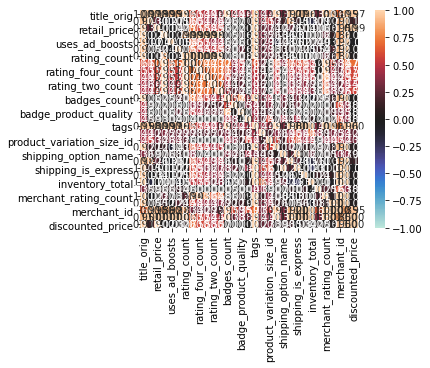

In [378]:
assoc = associations(eda_df,plot=False)
corr_eda_df_dython = assoc['corr']


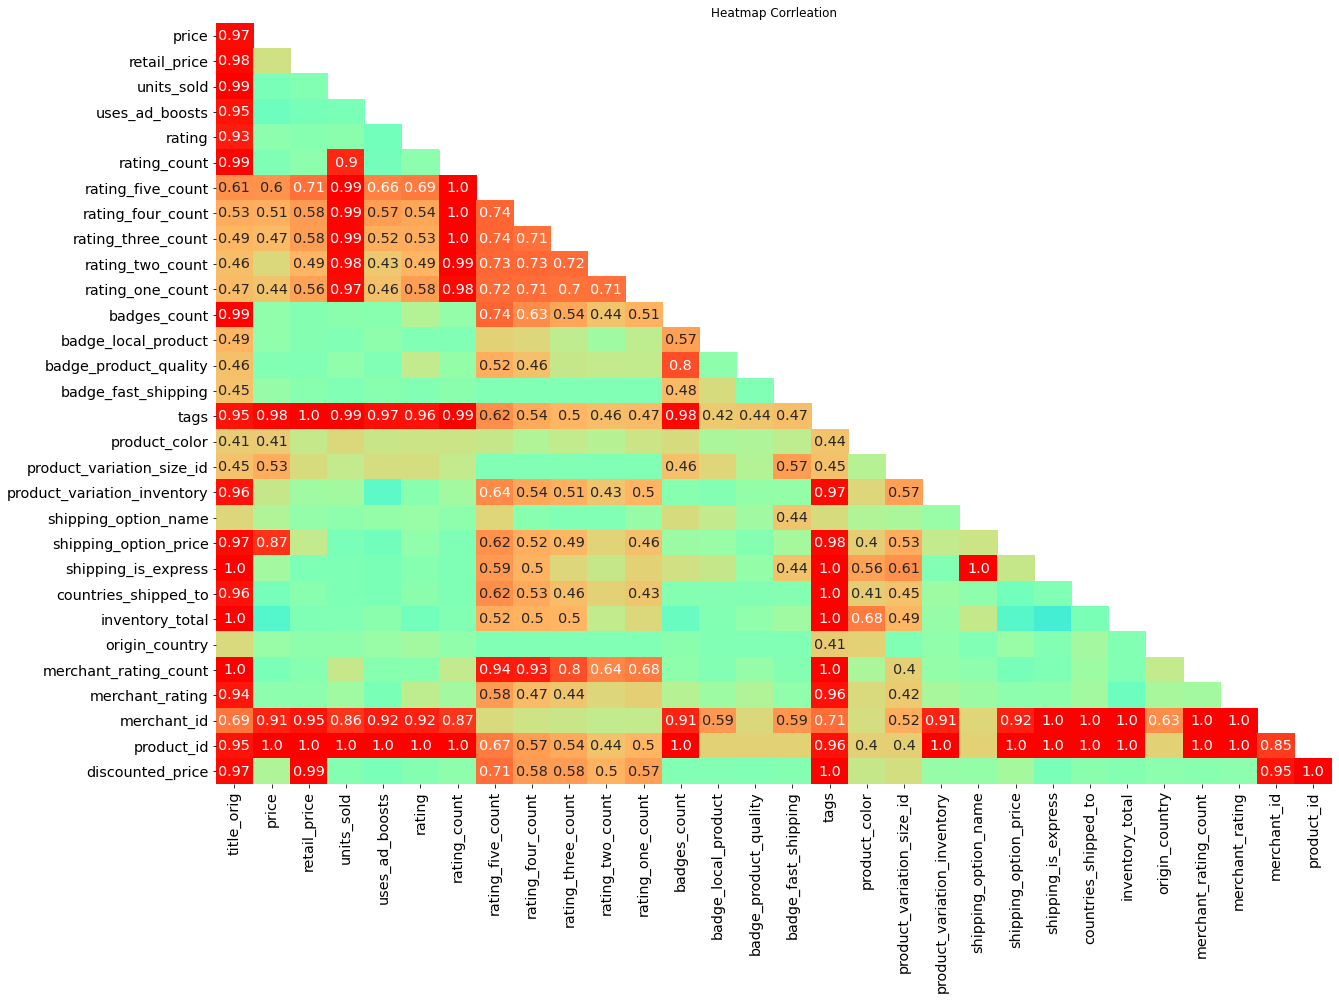

In [379]:
customized_heatmap(corr_eda_df_dython)

# Preprocessing

In [380]:
preprocess_df = eda_df.copy()

Lets first deal with colinear columns 

## Ratings

Ratings column as shown in Heatmaps are highly colinear with each other as expected, but since "rating" column is average of several star rating column,lets drop one star to five star column and since we are using rating column to predict, lets convert the average rating column to a category with low, mediumn and high ratings divided according to following threshold.

<2.5 = Low, 2.5 <= medium < 3.75, >3.75 = high 

In [381]:
preprocess_df.loc[:,preprocess_df.columns.str.startswith("rating")].columns

Index(['rating', 'rating_count', 'rating_five_count', 'rating_four_count',
       'rating_three_count', 'rating_two_count', 'rating_one_count'],
      dtype='object')

In [382]:
preprocess_df.drop([ 'rating_five_count', 'rating_four_count','rating_three_count','rating_two_count', 'rating_one_count'], axis=1, inplace=True)

In [383]:
def five_rating_to_level_rating(val):
    if val<2.5:
        return "low"
    elif 2.5>= val <3.75:
        return "medium"
    else:
        return "high"
    
    

In [384]:
ratings = preprocess_df.rating.apply(five_rating_to_level_rating)

In [385]:
ratings.value_counts()

high      1551
low         19
medium       3
Name: rating, dtype: int64

More on the dealing with class imbalances later below.

In [386]:

preprocess_df.rating = ratings

## IDs

Columns with ids will mislead our algorithms so lets drop them

In [387]:
preprocess_df.drop(['merchant_id', 'product_id'],axis=1, inplace=True)

## Origin Country, Shipping Names

These columns have about one value dominating about 98%. Moreover have very low correlation threshold. lets drop these two columns.

In [388]:
preprocess_df.drop(['origin_country', 'shipping_option_name'],axis=1, inplace=True)

In [389]:
preprocess_df.columns

Index(['title_orig', 'price', 'retail_price', 'units_sold', 'uses_ad_boosts',
       'rating', 'rating_count', 'badges_count', 'badge_local_product',
       'badge_product_quality', 'badge_fast_shipping', 'tags', 'product_color',
       'product_variation_size_id', 'product_variation_inventory',
       'shipping_option_price', 'shipping_is_express', 'countries_shipped_to',
       'inventory_total', 'merchant_rating_count', 'merchant_rating',
       'discounted_price'],
      dtype='object')

## Tags 

Lets refine tags column 

In [390]:
# Lets check the proportion of top 20 tags count 
(uniuqe_categories_count['count'].head(20).sum() / uniuqe_categories_count['count'].sum())*100

41.0016450374703

Since top 20 tags are 41% of total tags lets repalce make bag of words string from those top 20 tagsb


In [391]:
bag_of_words =uniuqe_categories_count.keyword.head(20).str.lower().tolist()
# bag_of_words_reg_pattern =["\\b{}\\b".format(word) for word in bag_of_words]
# bag_of_words_reg_pattern_str =  "|".join(bag_of_words_reg_pattern)

bag_of_words

['summer',
 "women's fashion",
 'fashion',
 'women',
 'casual',
 'plus size',
 'sleeveless',
 'dress',
 'shorts',
 'tops',
 'sexy',
 'beach',
 'sleeve',
 'short sleeves',
 'print',
 'shirt',
 'tank',
 'necks',
 'v-neck',
 'printed']

1. First replace uppercases with lowercases
2. Create separate columns with top 20 tags we created earlier. Then drop tags columns, also title_orig

In [392]:
for word in bag_of_words:
    # First check if str contains the word
    #If yes converto to 1 , if no convert to 0
    # Again convert 1 and 0 into strings for dummy variables later.
    
    preprocess_df["tag_"+word] = preprocess_df.tags.str.lower().str.contains(word).astype(int).astype(str)

In [393]:
preprocess_df.drop(['title_orig','tags'],axis=1,inplace=True)

## Product Color

The product color has positive correlation with inventory total and shipping price but this correlation does not makes sense. Lets not use this coloumn for prediction.


In [394]:
preprocess_df.drop('product_color', axis=1, inplace=True)

Discounted Price column has been created from the retial_price and price column so, lets not use the column.

In [395]:
preprocess_df.drop('discounted_price', axis=1, inplace=True)

# Modelling

## Classification

In [396]:
final_df = preprocess_df.copy()

In [397]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier as DC

In [398]:
final_df_dummified = pd.get_dummies(final_df, drop_first=True)
final_df_dummified['rating'] = final_df['rating']

## Dealing With Dependent Class Imbalances

In [399]:
dependent_classes_labels= preprocess_df.rating.value_counts().index.values
dependent_classes_values = preprocess_df.rating.value_counts().values
fig = go.Figure()
fig.add_trace(go.Pie(labels=dependent_classes_labels, values=dependent_classes_values))
fig.update_layout(title="Imbalances in Dependent Classes", legend_title="Target Classes", template="plotly_dark")

One of the classes is highly dominant. This can cause model to be biased. Hence, lets try to fix this issue using Oversampling. I am doint it at last becuase SMOTE needs all ints or dummified data.

In [400]:
from imblearn.over_sampling import SMOTE

In [401]:
X = final_df_dummified.loc[:,final_df_dummified.columns!='rating']
y= final_df_dummified['rating']

In [402]:
sm = SMOTE(sampling_strategy= 'not majority', random_state=101,k_neighbors=2)

X_res,y_res = sm.fit_resample(X,y)

In [403]:
y_res.value_counts()

low       1551
medium    1551
high      1551
Name: rating, dtype: int64

Now, the classes are balanced.

### Split 

In [404]:
X_train, X_test, y_train, y_test = train_test_split(X_res,y_res,random_state=101)

In [405]:
X_holdout, X_test_final, y_holdout, y_test_final = train_test_split(X_test, y_test,random_state=101)

In [406]:
pipe = Pipeline([('scaler', StandardScaler()), ('rf', RandomForestClassifier())])

pipe2 = Pipeline([('scaler_2', StandardScaler()), ('dc', DC())])

Lets calculate their time as well.

In [407]:
import time

In [408]:
rf_start = time.time()
pipe.fit(X_train,y_train)
rf_end = time.time()
eval_time_rf = rf_end -rf_start


In [409]:
dc_start = time.time()
pipe2.fit(X_train,y_train)
dc_end = time.time()
eval_time_dc = dc_end -dc_start


In [410]:
rf_start_pred = time.time()
pipe.predict(X_test)
rf_end_pred = time.time()
eval_time_rf_pred = rf_end_pred -rf_start_pred


In [411]:
dc_start_pred = time.time()
pipe2.predict(X_test)
dc_end_pred = time.time()
eval_time_dc_pred = dc_end_pred -dc_start_pred


In [412]:
print("Accuracy For Random forest on Validation Set: {}.".format(pipe.score(X_holdout,y_holdout)*100) )

print("Accuracy For Decision tree on Validation Set: {}.".format(pipe2.score(X_holdout,y_holdout)*100))

Accuracy For Random forest on Validation Set: 100.0.
Accuracy For Decision tree on Validation Set: 100.0.


In [413]:
print("Accuracy For Random forest on Test Set: {}.".format(pipe.score(X_test_final,y_test_final)*100) )

print("Accuracy For Decision tree on Test Set : {}.".format(pipe2.score(X_test_final,y_test_final)*100))

Accuracy For Random forest on Test Set: 99.65635738831615.
Accuracy For Decision tree on Test Set : 100.0.


In [414]:
print("Total time taken by RF to fit the model: {:.2f} sec".format(eval_time_rf))
print("Total time taken by Decision Tree to fit the model: {:.2f} sec".format(eval_time_dc))

Total time taken by RF to fit the model: 0.44 sec
Total time taken by Decision Tree to fit the model: 0.04 sec


In [415]:
print("Total time taken by RF to predict the test set: {:.2f} sec".format(eval_time_rf_pred))
print("Total time taken by Decision Tree to predict the test set: {:.2f} sec".format(eval_time_dc_pred))

Total time taken by RF to predict the test set: 0.03 sec
Total time taken by Decision Tree to predict the test set: 0.01 sec


Decision Tree seems to be doing better than Random Forest both in accuracy and time taken.